# Section 1: import necessary libraries and dataset 

In [14]:
# Import all the necessary packages 
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression, Ridge
import math
import matplotlib.pyplot as plt


In [3]:
# load train and test data 
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


# Section 2: Exploratory Data Analysis 

In [12]:
train.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


most of the variables are numeric 

In [25]:
print("train rows: ",train.shape[0])
print("train columns: ",train.shape[1])
print("test rows: ",test.shape[0])
print("test columns: ",test.shape[1]) 
# train data has 617 rows 
# test has 5 rows?


train rows:  617
train columns:  58
test rows:  5
test columns:  57


## target variable

C:\Users\Xiaoliu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


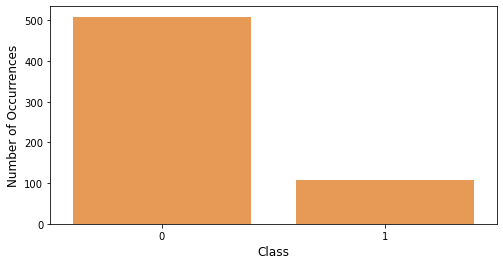

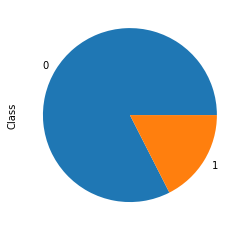

In [96]:
color = sns.color_palette()
int_level = train['Class'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(int_level.index, int_level.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.show()

plot_df = train.Class.value_counts()
plot_df.plot(kind="pie")
plt.show()  #pie chart of the target variable 

Important: From the pie chart we can see that the dataset is heavily imbalanced since the fraction of positive(1) samples is very small compared to the negative(0) samples.

Class level is 0 for most of the observations 

In [221]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
AB,617.0,0.477149,0.468388,0.081187,0.252107,0.354659,0.559763,6.161666
AF,617.0,3502.013221,2300.322717,192.593280,2197.345480,3120.318960,4361.637390,28688.187660
AH,617.0,118.624513,127.838950,85.200147,85.200147,85.200147,113.739540,1910.123198
AM,617.0,38.968552,69.728226,3.177522,12.270314,20.533110,39.139886,630.518230
AR,617.0,10.128242,10.518877,8.138688,8.138688,8.138688,8.138688,178.943634
AX,617.0,5.545576,2.551696,0.699861,4.128294,5.031912,6.431634,38.270880
AY,617.0,0.060320,0.416817,0.025578,0.025578,0.025578,0.036845,10.315851
AZ,617.0,10.566447,4.350645,3.396778,8.129580,10.461320,12.969516,38.971568
BC,617.0,8.053012,65.166943,1.229900,1.229900,1.229900,5.081244,1463.693448
BD,617.0,5350.388655,3021.326641,1693.624320,4155.702870,4997.960730,6035.885700,53060.599240


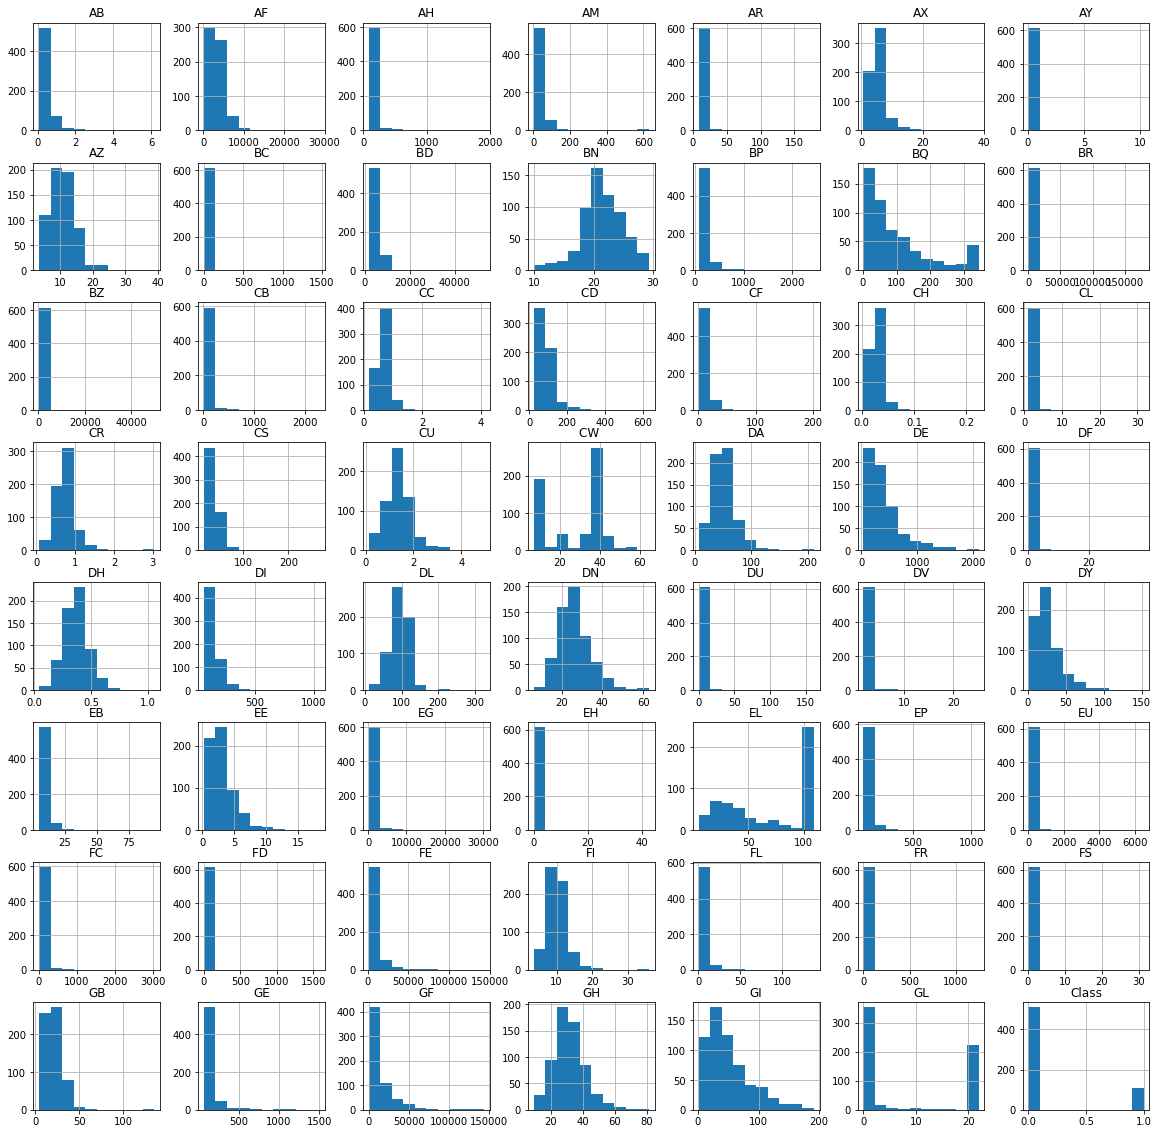

In [222]:
p = train.hist(figsize = (20,20))

The following code shows the distribution of numerical variables, where I find that most of the variables do not follow normal distribution. 

In [31]:
# Store all the numerical column names into a list
NUM_FEATURE_COLUMNS = [i for i in train.columns if i not in ["Id", "EJ", "Class"]]
#NUM_FEATURE_COLUMNS
print("In this list, we have",len(NUM_FEATURE_COLUMNS), "variables" )

In this list, we have 55 variables


### Deal with one categorical variable 'EJ'

In [62]:
#how many unqiue variable and how many missings we have within this column 
count = train.EJ.unique().size
print("there are",count,"unique values under this column: A, B")
nan_count = train['EJ'].isna().sum()
print("there are",nan_count,"missing values under this column")


there are 2 unique values under this column: A, B
there are 0 missing values under this column


In [223]:
# convert this column 'EJ' into two dummy variables and we only need to keep one for modeling. We keep column 'A' for instance
dummies = pd.get_dummies(train.EJ)
dummies = dummies.A
dummies

# column bind the new dummy df to the original train data 
train_new = pd.concat([train, dummies], axis=1)

# drop original categorical column 'EJ'
train_new = train_new.drop(['EJ'], axis=1)

# a function to check if the original column still there or not 
def check(col,df):
   if col in df:
      print ("Column", col, "exists in the DataFrame.")
   else:
      print ("Column", col, "does not exist in the DataFrame.")

col = 'EJ'
df= train_new

check(col,df)


Column EJ does not exist in the DataFrame.


# Section 3: Prepare the dataset for training and validation  

The new dataset is df, rather than train or train_new.
I will split the dataset 'df' into training and test 

Dataframe df has 'Id','Class', which should be excluded from the X dataframe 

### Data splitting 

In [229]:
X = df.drop(["Id","Class"],axis="columns")
Y = df["Class"]

In [230]:
from sklearn.model_selection import train_test_split
# Now I create 4 variables to place each parameter
X_train,X_test,Y_train,Y_real=train_test_split(X,Y,train_size = 0.8)
#to see the lenght:
print("X_train length",len(X_train))
print("X_test length",len(X_test))

X_train length 493
X_test length 124


### Missing values 

In [231]:
# test the missing values for X and Y 
print(X_train.isnull().sum()) # there are multiple features that have missing values 

# there is no missing value under the target variable 
print(Y.isnull().sum())

AB      0
AF      0
AH      0
AM      0
AR      0
AX      0
AY      0
AZ      0
BC      0
BD      0
BN      0
BP      0
BQ     49
BR      0
BZ      0
CB      2
CC      3
CD      0
CF      0
CH      0
CL      0
CR      0
CS      0
CU      0
CW      0
DA      0
DE      0
DF      0
DH      0
DI      0
DL      0
DN      0
DU      1
DV      0
DY      0
EB      0
EE      0
EG      0
EH      0
EL     48
EP      0
EU      0
FC      1
FD      0
FE      0
FI      0
FL      1
FR      0
FS      2
GB      0
GE      0
GF      0
GH      0
GI      0
GL      1
A       0
dtype: int64
0


In [232]:
# explore the rows with missing values 
test_null = X_train[['EL','BQ','CC','CB','DU','FL','FS','GL']]
test_null[test_null.isnull().any(axis=1)]

,EL,BQ,CC,CB,DU,FL,FS,GL
266,NaN,NaN,1.538831,14.774533,0.372438,3.452708,0.582478,0.110000
369,NaN,NaN,0.634650,12.499760,0.206910,54.719291,1.219140,0.019800
196,109.125159,NaN,0.674647,15.054858,3.489882,5.192682,0.711165,0.172565
573,NaN,NaN,0.648720,24.622689,0.620730,5.097005,0.067730,0.257400
594,41.967354,NaN,0.761854,27.609764,NaN,NaN,0.731484,NaN
358,NaN,NaN,0.760716,12.499760,0.937992,6.530993,0.318331,0.109191
125,NaN,NaN,0.715342,19.301100,0.434511,3.253336,0.338650,0.103714
178,NaN,344.644105,0.578083,768.900678,0.737979,5.437584,0.067730,0.255364
285,NaN,NaN,0.506868,19.052943,0.696597,6.124258,0.243828,0.147030
8,NaN,NaN,0.855496,116.100712,0.613833,4.762291,0.067730,0.073416


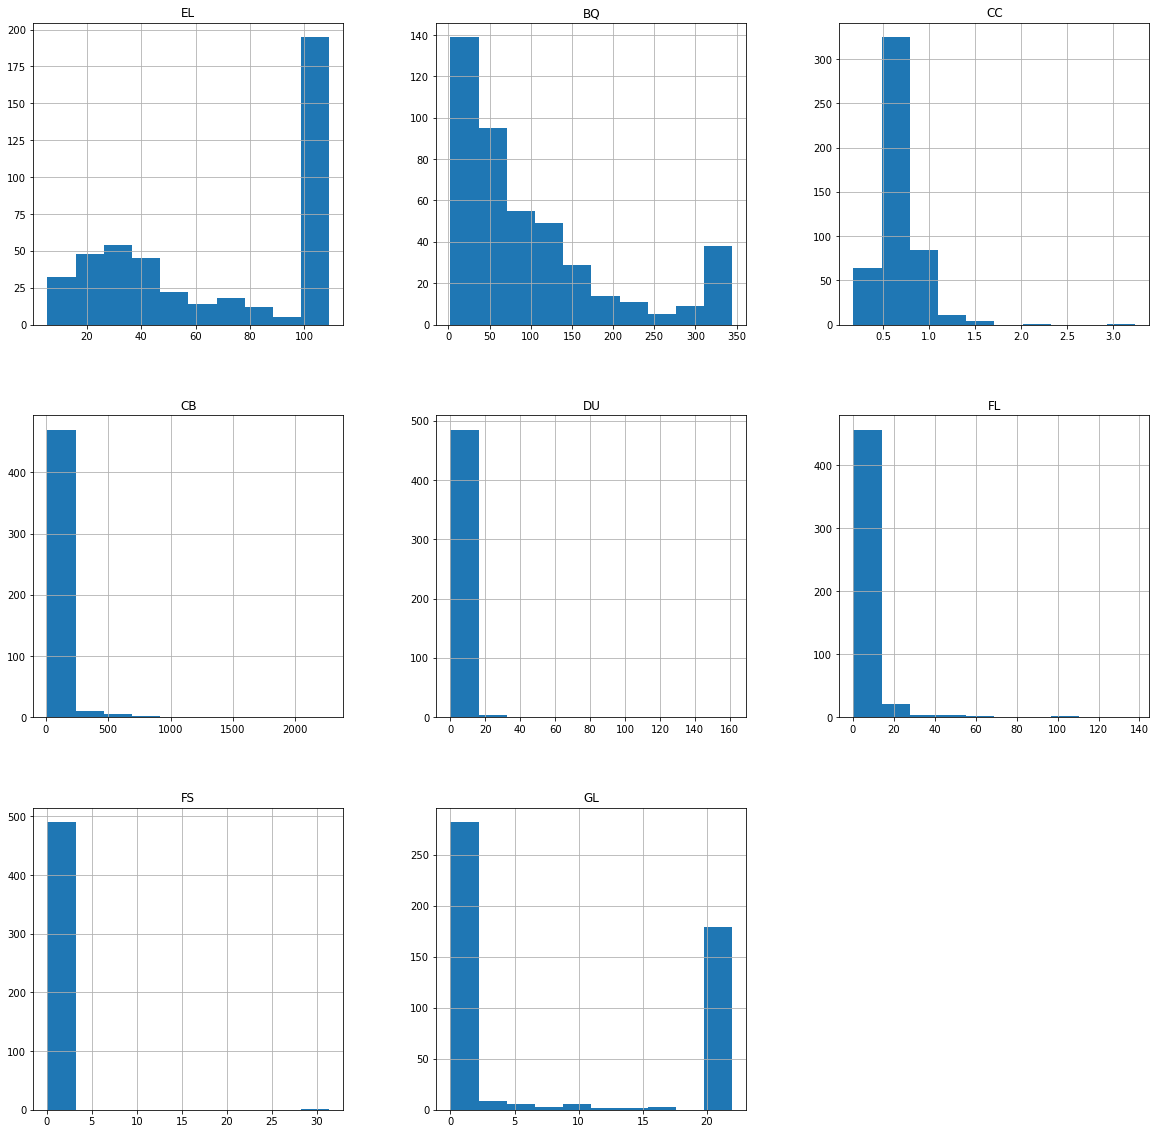

In [233]:
# impute nan values for the columns in accordance with their distribution
p = test_null.hist(figsize = (20,20))

# the distribution is skewed almost for all variables, so we use median to replace null 

In [237]:
# replace the NaN with mean for all features with missing values 
X_train = X_train.fillna(X_train.median()) 
X_test = X_test.fillna(X_test.median()) 

# use the following code to test if there is null anymore 

#print(X_train.isnull().sum())
#print(X_test.isnull().sum())
#print(Y_train.isnull().sum())

# Section 4.1: Models - Decision tree

There are multiple choices:

Decision tree; Logistic regression; SVM; Random Forest, KNN, XGboost  

### 4.1.2 Data Preprocessing 
Data normalization is not necessary for tree based models 


In [194]:
# Normalize the data 
# from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

### 4.1.3 Model 

In [246]:
# start with decision tree 
#If it is empty it will create it with as many levels it can. TO avoid this we put max_dep to determine how many levels we want
#The sext parameter will be the criteria. If I dont put it will use gini. If I wanted to use entropy I'd have to put it. I want to use gini, so I don't need to put it
from sklearn import tree
model_dt = tree.DecisionTreeClassifier(max_depth=5)   #model with deph 3, and use gini as criteria 
model_dt

DecisionTreeClassifier(max_depth=5)

### 4.1.3 Fit Model 

In [247]:
#Now the method fit will adjust data, trainning the model
model_dt.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=5)

In [248]:
Y_pred_dt = model_dt.predict(X_test)

### 4.1.4 Model Evaluation

Evaluate our model.

Evaluate models with different parameters<br>
Plot the score (accuracy) for each model using "plot_scores" function<br>
Report score for the best model<br>
Use "vis_predictions" function to visualize few examples of test/validation set with the corresponding predictions

accuracy is:  0.8790322580645161
precision is:  0.7727272727272727
recall is:  0.6296296296296297


<AxesSubplot:>

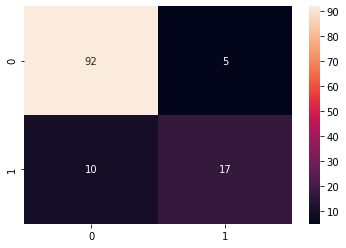

In [249]:
##Accuracy of base model
# Accuracy = true negatives + true positives / true positives + false positives + true negatives + false negatives
from sklearn import metrics
accuracy = metrics.accuracy_score(Y_real,Y_pred_dt)  
print("accuracy is: ",accuracy)

##Precision of base model
precision_dt = metrics.precision_score(Y_real,Y_pred_dt)  
precision_dt
print("precision is: ",precision_dt)

## Recall
# Recall = TP /(TP+FN)
# Recall = 1: the model didn’t miss any True Positives and is able to classify well between correctly and incorrectly labeling of patients.
# Recall = 0: the model has a high number of false negative 
recall_dt = metrics.recall_score(Y_real,Y_pred_dt)  
recall_dt
print("recall is: ",recall_dt)

import seaborn as sns
confusion_matrix_dt = metrics.confusion_matrix(Y_real,Y_pred_dt)
confusion_matrix_dt
# 0,0: 53 => True Negative
# 0,1: 0  => False Positive 
# 1,0: 23 => False Negative 
# 1,1: 4  => True Positive 
sns.heatmap(confusion_matrix_dt, annot=True)


In [250]:
# AUC-ROC Curve 
auc_dt = metrics.roc_auc_score(Y_real, Y_pred_dt) # as the documentation explain, the main parameters are: y_true and y_score
auc_dt

0.7890416189385262

### Decision Tree - k-Fold Cross-Validation

In [243]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [251]:
# replace the NaN with mean for all features with missing values 
X = X.fillna(X.mean()) 


In [252]:
kf_dt = KFold(n_splits=10,shuffle=True)  
cv_dt = cross_val_score(model_dt, X, Y, cv=kf_dt)
print("mean of cross-validation score is:",np.mean(cv_dt))
cv_dt

mean of cross-validation score is: 0.8702802749867795


array([0.83870968, 0.82258065, 0.87096774, 0.90322581, 0.88709677,
       0.88709677, 0.91935484, 0.83606557, 0.83606557, 0.90163934])

# Section 4.2: Models - Random Forest

In this section, I perform Random Forest

## 4.2.3 Fit Model 